# NPB Scraping & Analysis for Batter
* 野手のデータの可視化と分析を行う例
* 詳しくは技術書典９ 機械学習の炊いたん３を参照

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from npb_scraping import player

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 前処理（今後npb_scrapingに統合予定）
* データの取得時は`str`型なので数値データは`int`または`float`に変換
* 空文字や`--`などのスコアがない物はNaNに変換

In [11]:
def preprocessing(data):
    categorical_columns = ['Hand']
    delete_columns = ['Notes']
    
    data.drop(delete_columns, axis=1, inplace=True)
    
    for c in data.columns:
        data[c].loc[data[c] == ''] = np.nan
        data[c].loc[data[c] == '--'] = np.nan
    
    numerical_columns = data.drop(categorical_columns, axis=1).columns
    
    data[numerical_columns] = data[numerical_columns].astype(float)
    data = pd.get_dummies(data)
    return data

In [12]:
batter = player.ScrapingNPBBatter(year_list=np.arange(2016, 2020), team='Yokohama Bay Stars')

In [13]:
data = batter.get_table()

scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...


In [14]:
data

Age    G   PA   AB   R    H  2B 3B  \
team               year Name                                                    
Yokohama Bay Stars 2016 Sho Aranami         30   36   96   87   8   17   2  1   
                        Taketoshi Goto      36   27   30   23   2    6   1  0   
                        Elian Herrera       31   79  274  257  30   56  12  2   
                        Shotaro Ide         32   11   29   27   4    7   0  0   
                        Shota Imanaga       22   22   43   36   0    5   0  0   
...                                         ..  ...  ...  ...  ..  ...  .. ..   
                   2019 Neftali Soto        30  141  584  516  82  139  18  0   
                        Kentaro Taira       23   15   20   19   1    2   0  0   
                        Yasutaka Tobashira  29   45  111  100   6   20   4  2   
                        Yoshi Tsutsugo      27  131  557  464  74  126  24  0   
                        Yuudai Yamamoto     20   13   12   12   0    4   0  0   

                                            HR  RBI  ...   SLG   OPS   TB GDP  \
team               year Name                         ...                        
Yokohama Bay Stars 2016 Sho Aranami          0    7  ...  .241  .505   21   1   
                        Taketoshi Goto       1    6  ...  .435  .868   10   1   
                        Elian Herrera        5   33  ...  .339  .597   87   3   
                        Shotaro Ide          1    4  ...  .370  .646   10   0   
                        Shota Imanaga        0    1  ...  .139  .323    5   0   
...                                         ..  ...  ...   ...   ...  ...  ..   
                   2019 Neftali Soto        43  108  ...  .554  .902  286  14   
                        Kentaro Taira        0    0  ...  .105  .211    2   0   
                        Yasutaka Tobashira   1    6  ...  .310  .567   31   2   
                        Yoshi Tsutsugo      29   79  ...  .511  .899  237   5   
                        Yuudai Yamamoto      0    2  ...  .333  .667    4   0   

                                           HBP SH SF IBB Notes    Hand  
team               year Name                                            
Yokohama Bay Stars 2016 Sho Aranami          1  1  0   0          Left  
                        Taketoshi Goto       0  0  0   0         Right  
                        Elian Herrera        1  3  0   0        Double  
                        Shotaro Ide          0  0  1   0         Right  
                        Shota Imanaga        0  5  0   0          Left  
...                                         .. .. ..  ..   ...     ...  
                   2019 Neftali Soto         5  0  4   4         Right  
                        Kentaro Taira        0  1  0   0         Right  
                        Yasutaka Tobashira   1  2  1   0          Left  
                        Yoshi Tsutsugo       2  0  3   5          Left  
                        Yuudai Yamamoto      0  0  0   0         Right  

[176 rows x 26 columns]

In [27]:
batter = player.ScrapingNPBBatter(year_list=np.arange(2010, 2020))
data = batter.get_table()

scraping 2010...
scraping 2011...
scraping 2012...
scraping 2013...
scraping 2014...
scraping 2015...
scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...
scraping 2010...
scraping 2011...
scraping 2012...
scraping 2013...
scraping 2014...
scraping 2015...
scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...


In [28]:
tmp_data = data.copy()
tmp_data = preprocessing(tmp_data)

In [29]:
# isoD
tmp_data['IsoD'] = tmp_data['OBP'] - tmp_data['BA']

## 各選手の得点との相関

In [30]:
def team_scatter(x, y, data):
    # 相関
    corr = np.corrcoef([data[x].values, data[y].values])[0,1]
    plt.figure(figsize=(10,10))
    plt.title(f'{x} vs {y} Correlation: {corr}')
    sns.scatterplot(x=x, y=y, hue='team', data=data.reset_index())

In [31]:
# 打席数が5100以上
batters = tmp_data.loc[tmp_data['PA'] > 100]

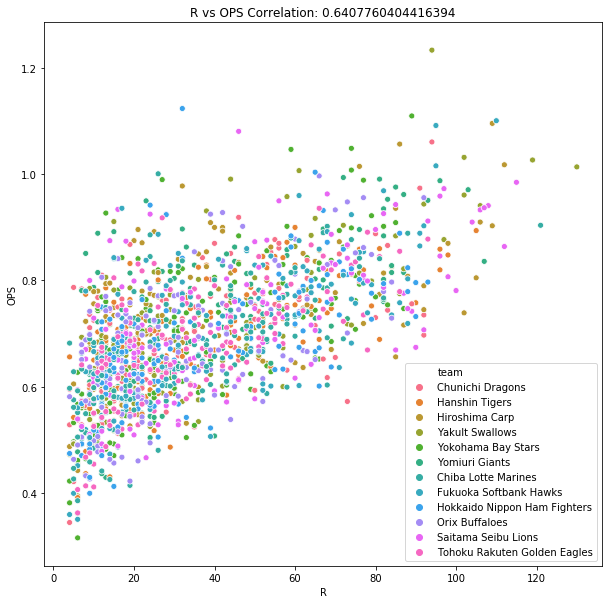

In [32]:
team_scatter('R', 'OPS', batters)

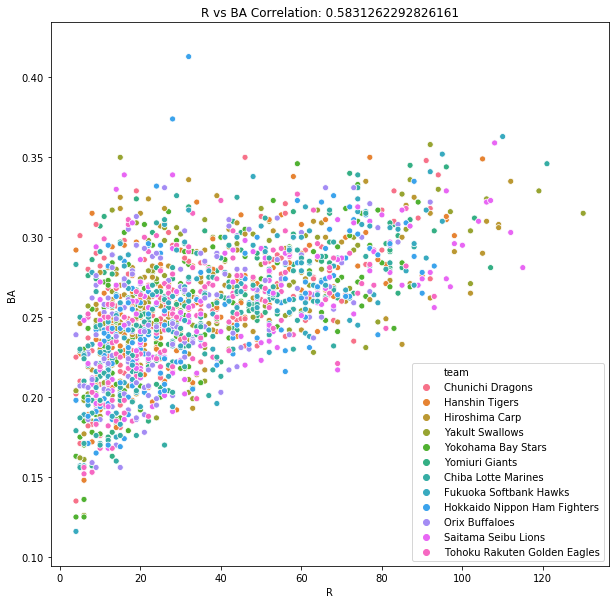

In [33]:
team_scatter('R', 'BA', batters)

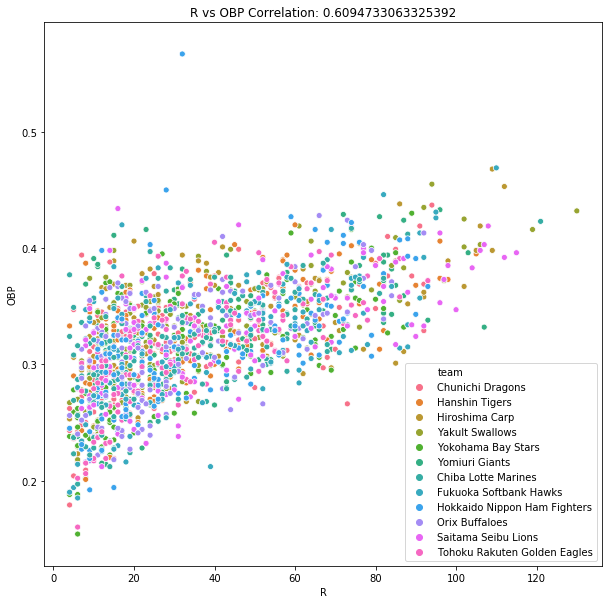

In [34]:
team_scatter('R', 'OBP', batters)

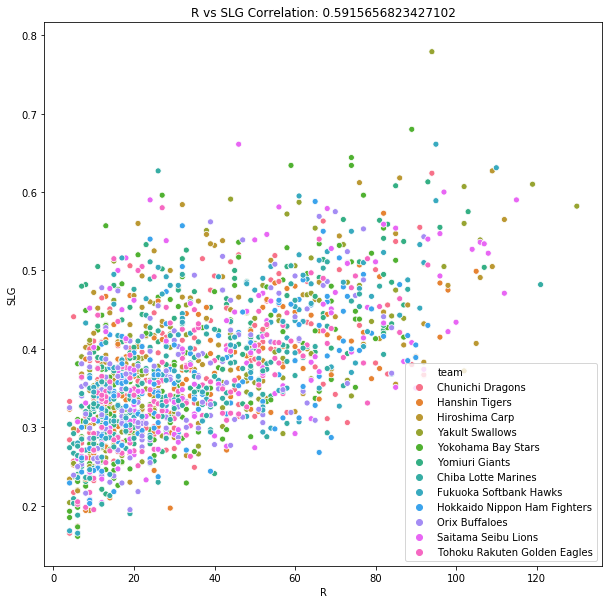

In [35]:
team_scatter('R', 'SLG', batters)

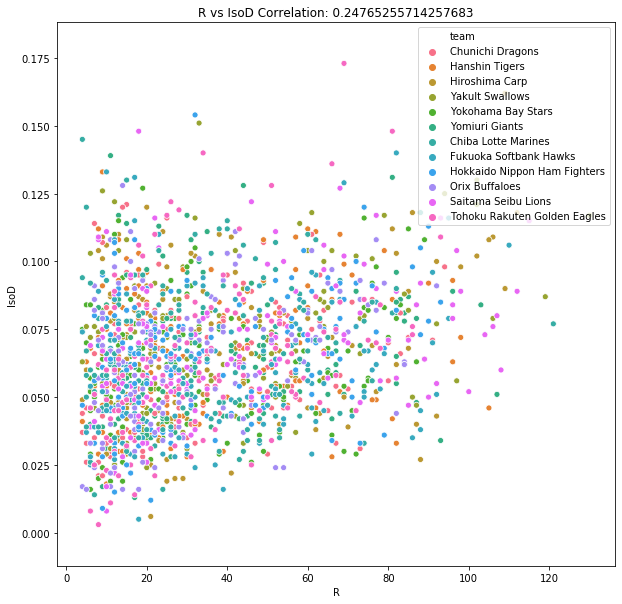

In [36]:
team_scatter('R', 'IsoD', batters)

## 平均OPSと総得点数の相関（10年）

In [37]:
npb_10 = player.ScrapingNPBBatter(year_list=np.arange(2010, 2020))

In [38]:
data_10 = npb_10.get_table()

scraping 2010...
scraping 2011...
scraping 2012...
scraping 2013...
scraping 2014...
scraping 2015...
scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...
scraping 2010...
scraping 2011...
scraping 2012...
scraping 2013...
scraping 2014...
scraping 2015...
scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...


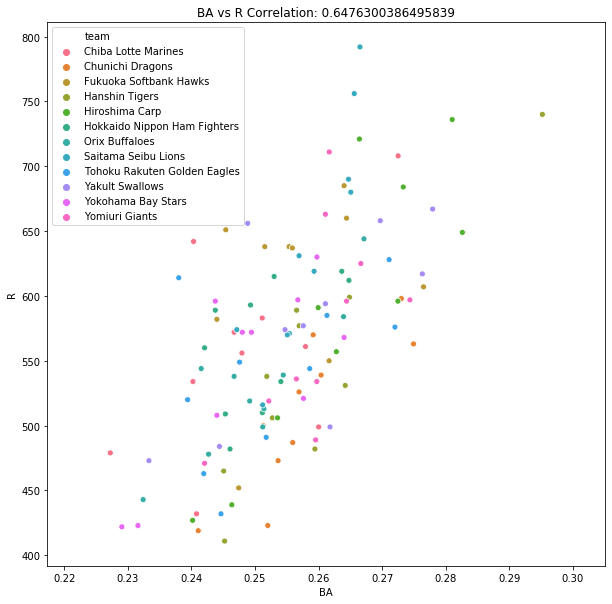

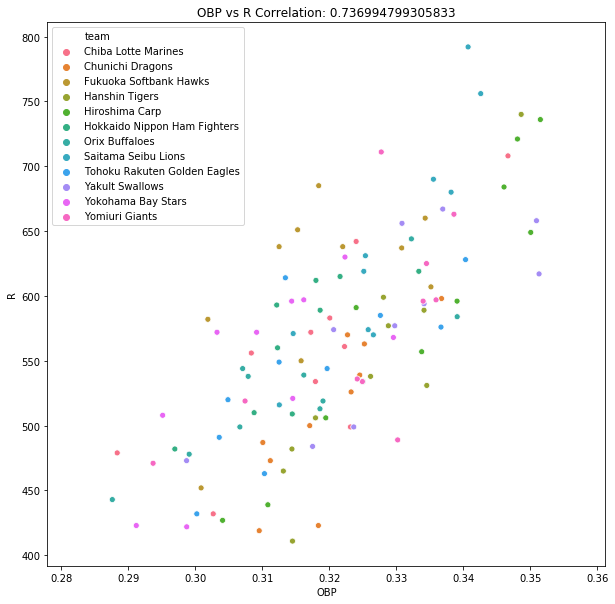

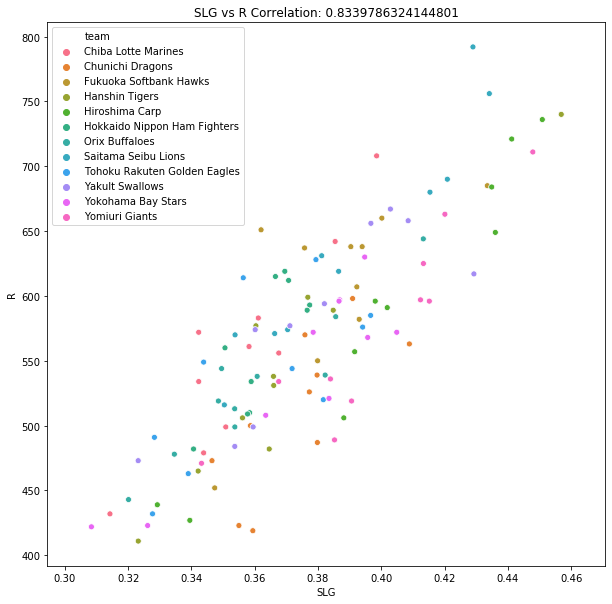

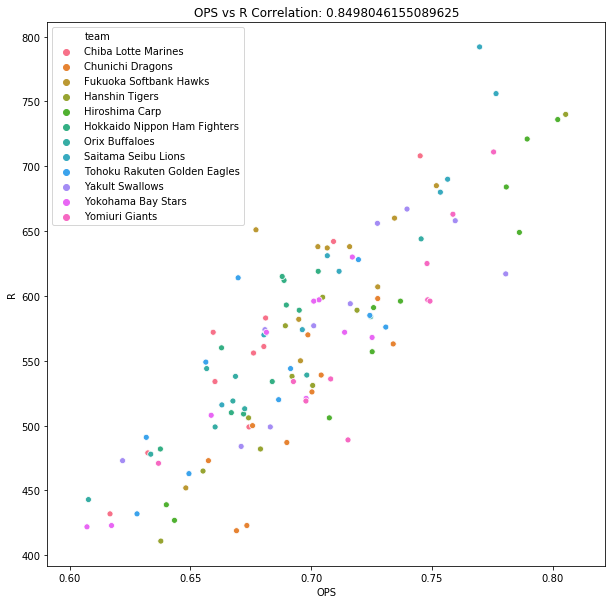

In [39]:
data_10 = preprocessing(data_10)

# 打席数が100以上
batters = data_10.loc[data_10['PA'] > 100]

columns = ['BA', 'OBP', 'SLG', 'OPS']

# チームの年毎の平均データ
avg_data = batters.reset_index().groupby(['team', 'year']).mean()[columns]
# チームの年毎の累計得点
total_run = data_10.reset_index().groupby(['team', 'year']).sum()['R']

viz_data = pd.concat([avg_data, total_run], axis=1)


def team_scatter(x, y, data):
    """相関の計算とScatterプロットを行う関数
    """
    # 相関
    corr = np.corrcoef([data[x].values, data[y].values])[0,1]
    plt.figure(figsize=(10,10))
    plt.title(f'{x} vs {y} Correlation: {corr}')
    sns.scatterplot(x=x, y=y, hue='team', data=data.reset_index())

for c in columns:
    team_scatter(c, 'R', viz_data)

### ここ10年のチーム毎のOPSの傾向
* 相対値を見るために年毎に正規化

In [40]:
def get_relative_data(data, league_teams, column):
    league_data = data.loc[pd.IndexSlice[league_teams, :, :], :]
    year_mean = league_data.groupby('year').mean()
    
    relative_data = league_data - year_mean
    
    # イニング数で重み付け
    relative_data[f'PA_{column}'] = relative_data[column]*league_data['PA']/445
    
    return relative_data

In [41]:
   def sum_relative_distplot(data, league_teams, column, xlim=(-0.6, 0.6)):
    fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
    
    relative_data = get_relative_data(data, league_teams, column)
    
    for i, c in enumerate(league_teams):
        team_data = relative_data.loc[pd.IndexSlice[c, :, :], f'PA_{column}']
        sum_team_score = team_data.sum()
        
        ax = axes[i//3, i%3]
        sns.distplot(team_data, ax=ax)
        ax.set_title(f'{c}, score: {sum_team_score:.3f}')
        ax.set_xlim(*xlim)
    plt.show()
    
def relative_bar_for_year(data, league_teams, column, margin=0.05):
    fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
    
    relative_data = get_relative_data(data, league_teams, column)
    
    max_score = -np.inf
    min_score = np.inf
    
    for i, c in enumerate(league_teams):
        team_data = relative_data.loc[pd.IndexSlice[c, :, :], f'PA_{column}']
        sum_team_score_for_year = team_data.groupby('year').sum()
        
        ax = axes[i//3, i%3]
        ax.bar(sum_team_score_for_year.index, sum_team_score_for_year)
        ax.set_title(f'{c}')
        
        max_team_score = max(sum_team_score_for_year)
        min_team_score = min(sum_team_score_for_year)
        
        if max_score < max_team_score:
            max_score = max_team_score
            
        if min_score > min_team_score:
            min_score = min_team_score
        
    for i, _ in enumerate(league_teams):
        ax = axes[i//3, i%3]
        ax.set_ylim(min_score-margin, max_score+margin)
    
    plt.show()

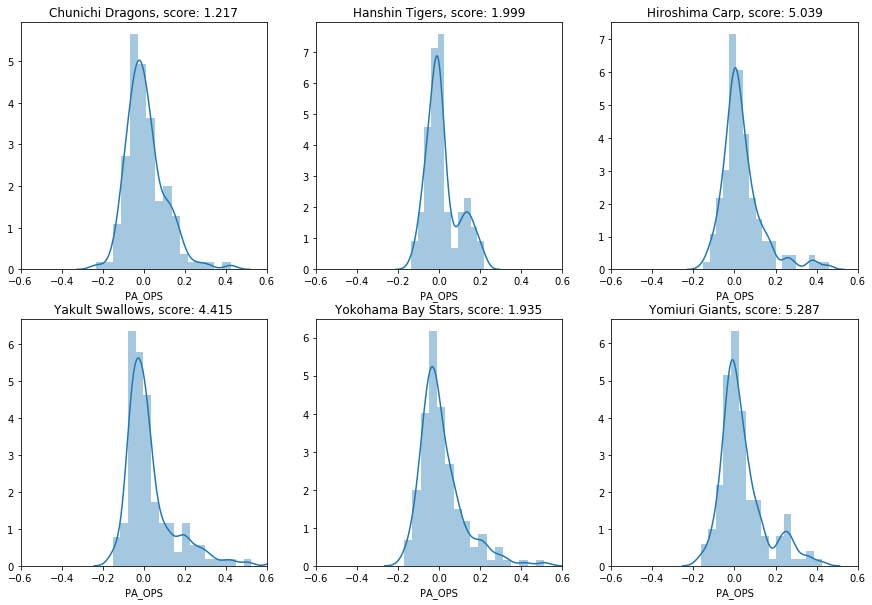

In [42]:
sum_relative_distplot(batters, player.C_TEAM_NAMES, 'OPS')

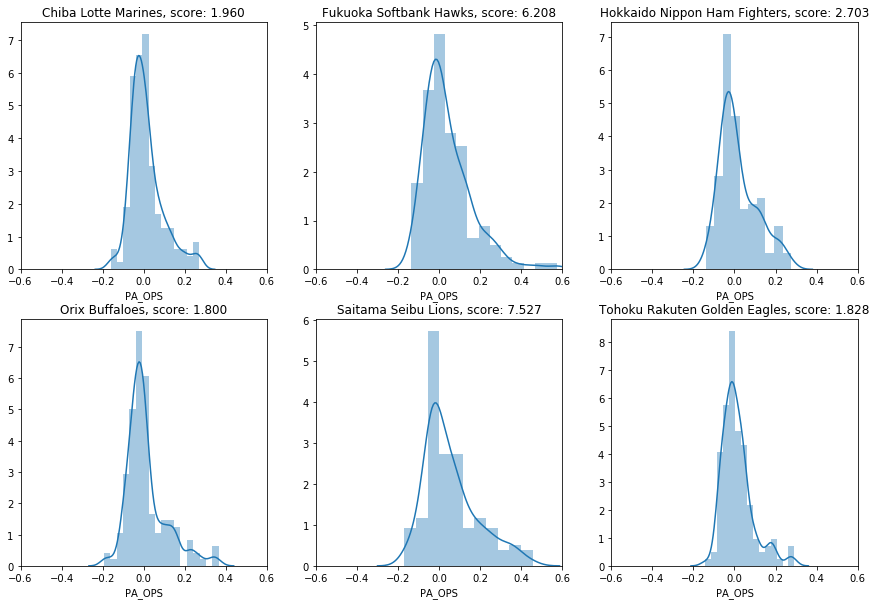

In [43]:
sum_relative_distplot(batters, player.P_TEAM_NAMES, 'OPS')

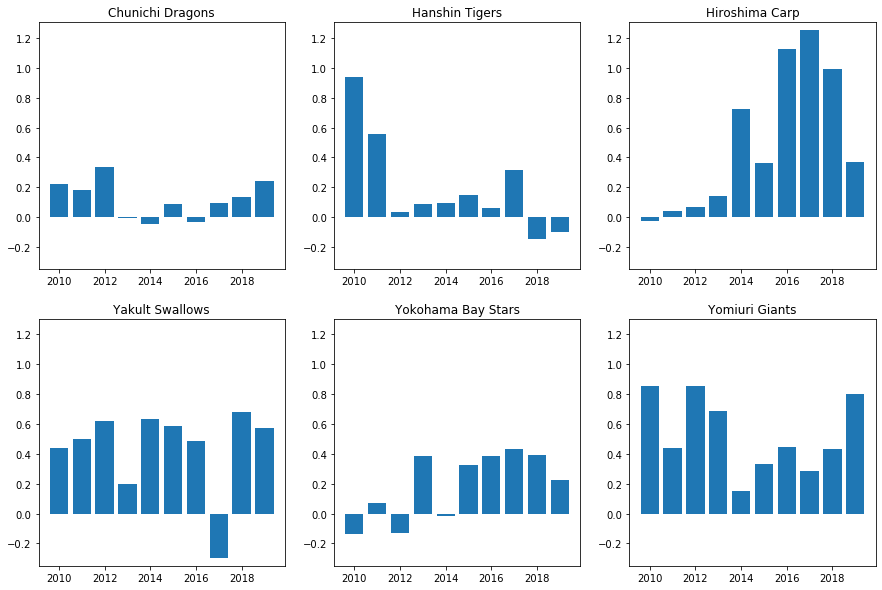

In [44]:
relative_bar_for_year(batters, player.C_TEAM_NAMES, 'OPS')

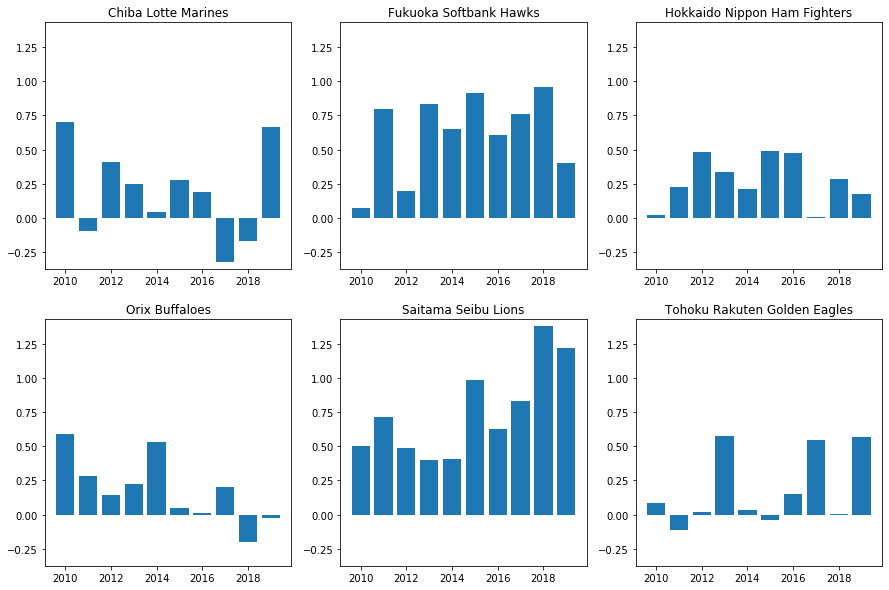

In [45]:
relative_bar_for_year(batters, player.P_TEAM_NAMES, 'OPS')

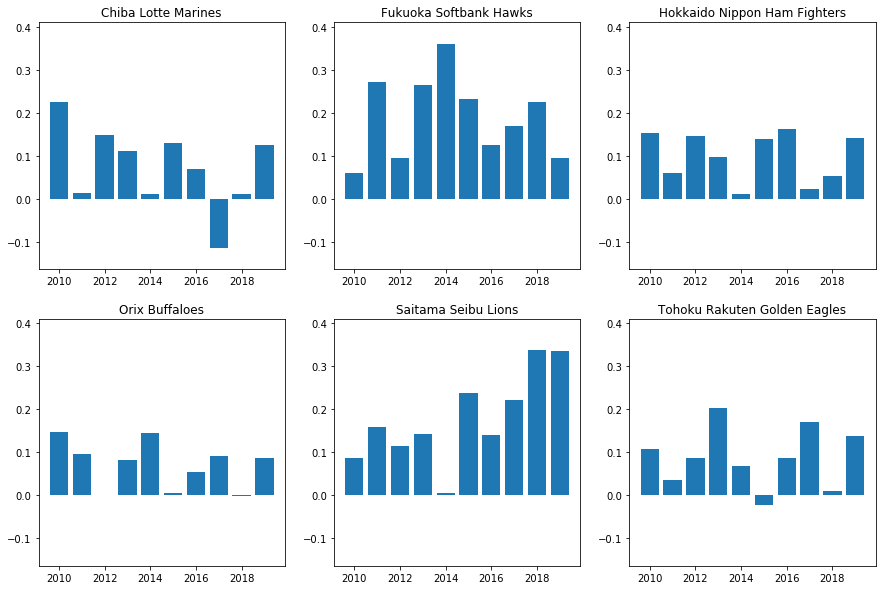

In [46]:
relative_bar_for_year(batters, player.P_TEAM_NAMES, 'BA')

In [47]:
def ranking_for_year(data, league_teams, column):
    
    relative_data = get_relative_data(data, league_teams, column)
    
    data_list = []
    
    for i, c in enumerate(league_teams):
        team_data = relative_data.loc[pd.IndexSlice[c, :, :], f'PA_{column}']
        sum_team_score = team_data.groupby('year').sum()
        sum_team_score.name = c
        data_list.append(sum_team_score)
    
    return pd.concat(data_list, axis=1)

In [48]:
ranking = ranking_for_year(batters, player.C_TEAM_NAMES, 'OPS')
ranking.rank(axis=1, ascending=False)

,Chunichi Dragons,Hanshin Tigers,Hiroshima Carp,Yakult Swallows,Yokohama Bay Stars,Yomiuri Giants
year,,,,,,
2010,4.0,1.0,5.0,3.0,6.0,2.0
2011,4.0,1.0,6.0,2.0,5.0,3.0
2012,3.0,5.0,4.0,2.0,6.0,1.0
2013,6.0,5.0,4.0,3.0,2.0,1.0
2014,6.0,4.0,1.0,2.0,5.0,3.0
2015,6.0,5.0,2.0,1.0,4.0,3.0
2016,6.0,5.0,1.0,2.0,4.0,3.0
2017,5.0,3.0,1.0,6.0,2.0,4.0
2018,5.0,6.0,1.0,2.0,4.0,3.0


In [49]:
ranking = ranking_for_year(batters, player.P_TEAM_NAMES, 'OPS')
ranking.rank(axis=1, ascending=False)

,Chiba Lotte Marines,Fukuoka Softbank Hawks,Hokkaido Nippon Ham Fighters,Orix Buffaloes,Saitama Seibu Lions,Tohoku Rakuten Golden Eagles
year,,,,,,
2010,1.0,5.0,6.0,2.0,3.0,4.0
2011,5.0,1.0,4.0,3.0,2.0,6.0
2012,3.0,4.0,2.0,5.0,1.0,6.0
2013,5.0,1.0,4.0,6.0,3.0,2.0
2014,5.0,1.0,4.0,2.0,3.0,6.0
2015,4.0,2.0,3.0,5.0,1.0,6.0
2016,4.0,2.0,3.0,6.0,1.0,5.0
2017,6.0,2.0,5.0,4.0,1.0,3.0
2018,5.0,2.0,3.0,6.0,1.0,4.0


## IsoDランキング

In [50]:
batters['IsoD'] = batters['OBP'] - batters['BA']

for y in np.arange(2010, 2020):
    print(f'--- {y} ---')
    display(batters.loc[pd.IndexSlice[:, y, :], 'IsoD'].sort_values(ascending=False).head(5))
    

--- 2010 ---


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


team                 year  Name           
Yakult Swallows      2010  Aaron Guiel        0.151
Saitama Seibu Lions  2010  Ryo Sakata         0.148
Hiroshima Carp       2010  Justin Huber       0.120
Chiba Lotte Marines  2010  Tadahito Iguchi    0.118
Yomiuri Giants       2010  Seung Yuop Lee     0.117
Name: IsoD, dtype: float64

--- 2011 ---


team              year  Name               
Chunichi Dragons  2011  Keiji Oyama            0.114
Hiroshima Carp    2011  Jun Hirose             0.111
Yomiuri Giants    2011  Yoshinobu Takahashi    0.111
Hiroshima Carp    2011  Yoshikazu Kura         0.109
Chunichi Dragons  2011  Kazuhiro Wada          0.107
Name: IsoD, dtype: float64

--- 2012 ---


team                    year  Name               
Hanshin Tigers          2012  Kentaro Sekimoto       0.133
Fukuoka Softbank Hawks  2012  Nobuhiko Matsunaka     0.133
Yokohama Bay Stars      2012  Naoto Watanabe         0.127
Yomiuri Giants          2012  Yoshinobu Takahashi    0.117
Yakult Swallows         2012  Wladimir Balentien     0.114
Name: IsoD, dtype: float64

--- 2013 ---


team                          year  Name              
Tohoku Rakuten Golden Eagles  2013  Andruw Jones          0.148
Yomiuri Giants                2013  Shinnosuke Abe        0.131
Yakult Swallows               2013  Wladimir Balentien    0.125
Hanshin Tigers                2013  Takashi Toritani      0.120
Chiba Lotte Marines           2013  Kazuya Fukuura        0.120
Name: IsoD, dtype: float64

--- 2014 ---


team                          year  Name              
Tohoku Rakuten Golden Eagles  2014  Andruw Jones          0.173
Yomiuri Giants                2014  Frederich Cepeda      0.139
Saitama Seibu Lions           2014  Takeya Nakamura       0.127
Chunichi Dragons              2014  Motonobu Tanishige    0.121
Yakult Swallows               2014  Wladimir Balentien    0.118
Name: IsoD, dtype: float64

--- 2015 ---


team                          year  Name           
Yomiuri Giants                2015  Shinnosuke Abe     0.128
Tohoku Rakuten Golden Eagles  2015  Wily Mo Pena       0.128
                                    Motohiro Shima     0.119
Chunichi Dragons              2015  Masahiko Morino    0.116
Hiroshima Carp                2015  Yoshihiro Maru     0.112
Name: IsoD, dtype: float64

--- 2016 ---


team                          year  Name           
Fukuoka Softbank Hawks        2016  Yuki Yanagita      0.140
                                    Akira Nakamura     0.129
Tohoku Rakuten Golden Eagles  2016  Motohiro Shima     0.122
Yakult Swallows               2016  Tetsuto Yamada     0.121
Chunichi Dragons              2016  Masahiko Morino    0.120
Name: IsoD, dtype: float64

--- 2017 ---


team                          year  Name           
Hokkaido Nippon Ham Fighters  2017  Kensuke Kondoh     0.154
Tohoku Rakuten Golden Eagles  2017  Motohiro Shima     0.140
Saitama Seibu Lions           2017  Hotaka Yamakawa    0.122
Yakult Swallows               2017  Tetsuto Yamada     0.117
Fukuoka Softbank Hawks        2017  Yuki Yanagita      0.116
Name: IsoD, dtype: float64

--- 2018 ---


team                 year  Name               
Hiroshima Carp       2018  Yoshihiro Maru         0.162
Chiba Lotte Marines  2018  Tsuyoshi Sugano        0.130
Orix Buffaloes       2018  Yuki Miyazaki          0.128
Yakult Swallows      2018  Kazuhiro Hatakeyama    0.126
                           Takahiro Araki         0.122
Name: IsoD, dtype: float64

--- 2019 ---


team                          year  Name          
Chiba Lotte Marines           2019  Kennys Vargas     0.145
Tohoku Rakuten Golden Eagles  2019  Jabari Blash      0.136
Fukuoka Softbank Hawks        2019  Yuki Yanagita     0.131
Yakult Swallows               2019  Tetsuto Yamada    0.130
Hokkaido Nippon Ham Fighters  2019  Kensuke Kondoh    0.120
Name: IsoD, dtype: float64

* 相対的なIsoDの分布と総合評価を計算

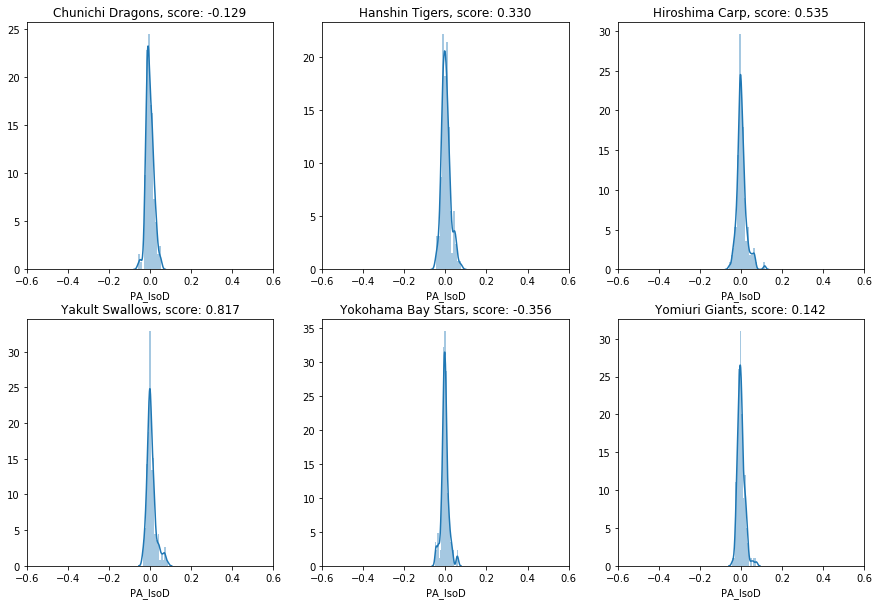

In [51]:
sum_relative_distplot(batters, player.C_TEAM_NAMES, 'IsoD')

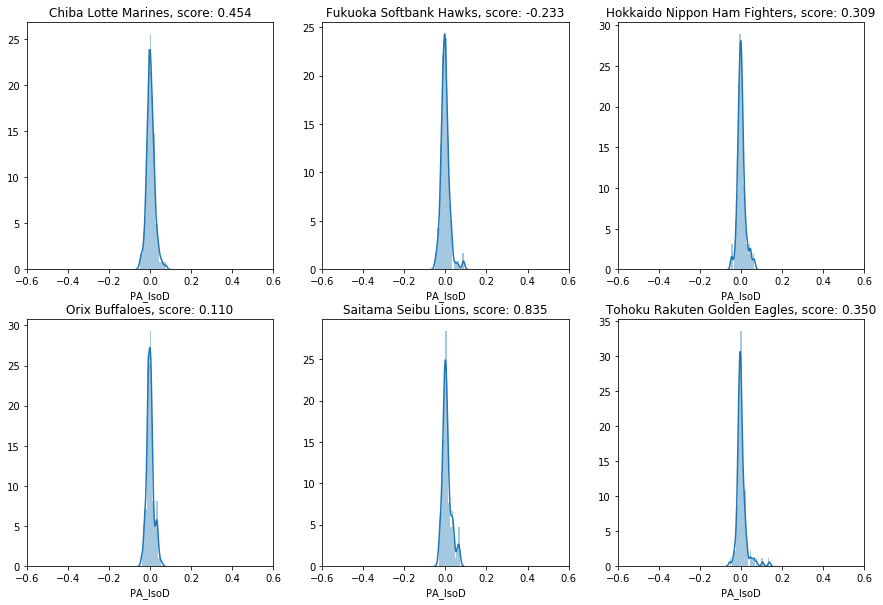

In [52]:
sum_relative_distplot(batters, player.P_TEAM_NAMES, 'IsoD')

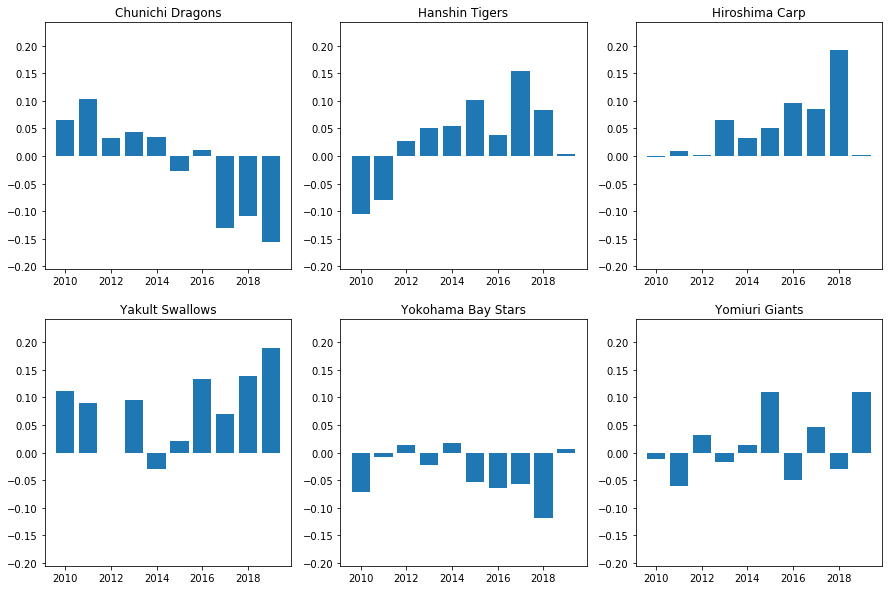

In [53]:
relative_bar_for_year(batters, player.C_TEAM_NAMES, 'IsoD')

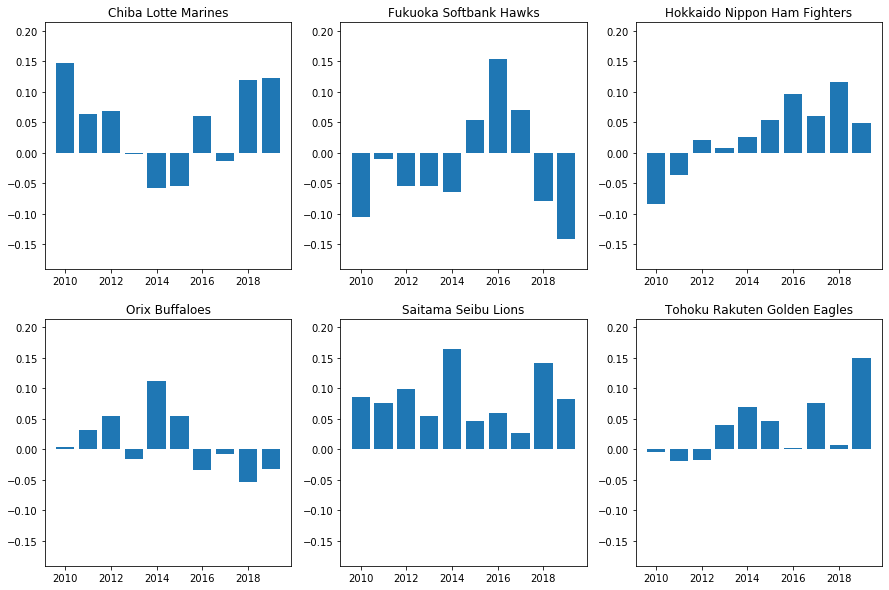

In [54]:
relative_bar_for_year(batters, player.P_TEAM_NAMES, 'IsoD')